<a href="https://colab.research.google.com/github/LunabaLeeris/Regression-Notebook/blob/main/LogisticRegressionUsingSigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experiment around logistic regression that made use of the sigmoid function
$$
h(x) = \frac{1}{1 + e^{-T^T\theta}}
$$

Using this function, we can create a logistic linear regression model using the following update function (GRADIENT ASCENT)

$$
\theta_j^{k + 1} = \theta_i^k + aT(Y - S)
$$

where (d = number of dimensions | m = number of features)

$T \exists \mathbb{R} ^{d\times m}$ = Training Data

$Y\exists\mathbb{R}^{m \times 1}$ = Training Output

$S\exists\mathbb{R}^{m \times 1}$ = Hypothesis which can be calculated as

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[12.902254],
       [-2.831879]], dtype=float32)>


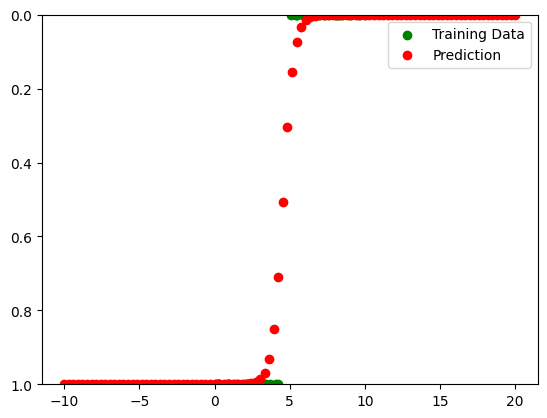

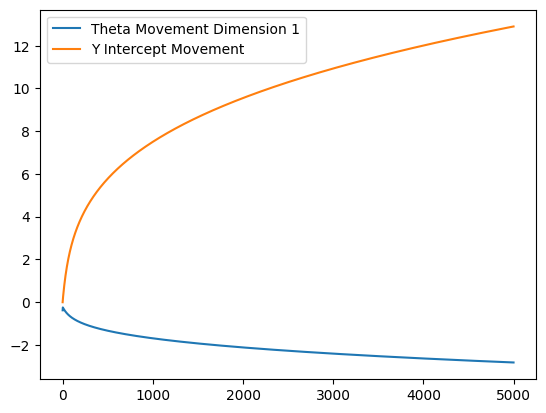

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

T = tf.constant([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [6.394267984578837, 0.25010755222666936, 2.7502931836911926, 2.2321073814882277, 7.364712141640124,
                  6.766994874229113, 8.921795677048454, 0.8693883262941615, 4.2192181968527045, 0.29797219438070344,
                  2.1863797480360336, 5.053552881033624, 0.26535969683863625, 1.988376506866485, 6.498844377795232,
                  5.449414806032166, 2.204406220406967, 5.892656838759088, 8.094304566778266, 0.06498759678061017,
                  8.05819251832808, 6.981393949882269, 3.4025051651799187, 1.5547949981178155, 9.572130722067811,
                  3.365945451126268, 0.9274584338014791, 0.9671637683346401, 8.474943663474598, 6.037260313668911,
                  8.071282732743802, 7.297317866938179, 5.506058857260264, 6.628240927476112, 1.3608912218786458,
                  8.26861603480089, 9.031856831867762, 4.068073127595591, 2.1800947301761057, 8.292046035674055,
                  0.18544794970161756, 0.7425796230289069, 6.1886091335565325, 5.390927201204537, 9.996660655937922,
                  6.852195003191236, 9.600818353483351, 7.594829816678685, 3.6796786383088254, 2.972352536223722]], dtype= tf.float32)

T_transpose = tf.transpose(T)

Y = tf.constant([[0], [1], [1], [1], [0], [0], [0], [1], [1], [1], [1], [0], [1], [1], [0],
                 [0], [1], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0],
                 [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1]], dtype= tf.float32)

THETA = tf.Variable([[0], [0]], dtype=tf.float32)

def plot_training_data_and_prediction():
  T_x = T.numpy()[1]                                  # Training Data
  Y_y = [y[0] for y in Y.numpy()]                     # Training Output
  P = [tf.ones(100), tf.linspace(-10., 20., 100)]     # Values To Predict
  H = tf.sigmoid(tf.matmul(tf.transpose(P), THETA))   # Hypothesis
  P_x = P[1]
  H_y = [h[0] for h in H]

  print(THETA)
  plt.scatter(T_x, Y_y, color="green", label="Training Data")
  plt.scatter(P_x, H_y, color="red", label="Prediction")
  plt.ylim(1, 0)

  plt.legend()
  plt.show()

def logistic_regression(alpha, iterations):
  THETA_H = [[], []]
  ITERATIONS = []

  for i in range(iterations):
    S = tf.sigmoid(tf.matmul(T_transpose, THETA))

    THETA.assign(THETA + alpha * tf.matmul(T, tf.subtract(Y, S)))
    THETA_H[0].append(THETA.numpy()[0][0])
    THETA_H[1].append(THETA.numpy()[1][0])
    ITERATIONS.append(i)

  plot_training_data_and_prediction()
  plt.plot(ITERATIONS, THETA_H[1], label="Theta Movement Dimension 1")
  plt.plot(ITERATIONS, THETA_H[0], label="Y Intercept Movement")

  plt.legend()
  plt.show()

# TEST
# PARAM 1: alpha | PARAM 2 : Iterations
logistic_regression(0.005, 5000)